<a href="https://colab.research.google.com/github/jokoeliyanto/ppp/blob/main/%5B1%5D_Data_Retail_Analysis_using_Python_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
  <tr><td>
    <img src="https://raw.githubusercontent.com/jokoeliyanto/ppp/main/images/h1.png">
  </td></tr>
<table>

# Project Background

This is a project with replica data. This is a data analysis project for a retail company. The data provided is sales data to consumers from January 2019 to January 2020. With the available data, we are expected to be able to generate insights to help refine the retail company's sales strategy. This project was inspired by the following web page:

https://www.kdnuggets.com/2021/04/e-commerce-data-analysis-sales-strategy-python.html

This project also uses the same dataset.

# Problems Statements

1. What month did you get the highest and lowest sales each year? How much income was earned at that time?
2. Which city has the highest and lowest sales?
3. Provide recommendations on the right time to place ads to maximize the possibility of buying the most consumers!
4. What products sell the most? What do you think the reason is?

# Data Analysis Steps Using Python Pandas
 
1. Loading dataset for per month in dataframe
2. Merge data per month into one dataframe
3. Doing Data Cleaning
4. Conduct analysis to answer given business problems & questions

# Data Preparation

## Impor Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [2]:
# Import monthly sales data for January 2019
df1=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_January_2019.csv")
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [3]:
df2=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_February_2019.csv")
df3=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_March_2019.csv")
df4=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_April_2019.csv")
df5=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_May_2019.csv")
df6=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_June_2019.csv")
df7=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_July_2019.csv")
df8=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_August_2019.csv")
df9=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_September_2019.csv")
df10=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_October_2019.csv")
df11=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_November_2019.csv")
df12=pd.read_csv("https://raw.githubusercontent.com/jokoeliyanto/ppp/main/dataset/Sales_December_2019.csv")

In [4]:
# Create a list containing all dataframes
list_df_month=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [5]:
# View the size of each dataframe
for i in list_df_month:
    print(i.shape)

(9723, 6)
(12036, 6)
(15226, 6)
(18383, 6)
(16635, 6)
(13622, 6)
(14371, 6)
(12011, 6)
(11686, 6)
(20379, 6)
(17661, 6)
(25117, 6)


Each dataframe has the same number of columns so it can be combined by the method `.concat()`

### Combining Dataset

In [6]:
# Combining datasets with methods .concat()
df=pd.concat(list_df_month)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Dataset Initial Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Check and Remove `Missing Value`

In [8]:
# Check the amount of missing values in each column
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
# Calculate the percentage of missing value
(df.isnull().sum().sum())/len(df)*100 

1.75006689858175

The datasets have 1.75% missing value

In [10]:
# Remove missing values
df=df.dropna()

# Check the missing value of each column
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Missing value has been deleted successfully

## Remove Unnecessary Data

There are interesting findings, namely data rows containing column names, then these data must be deleted (drop)

In [11]:
df.iloc[1069,::]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 1073, dtype: object

In [12]:
df.drop(df[df['Order Date']=='Order Date'].index, inplace=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


## Changing Column Data Type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


Will change the data type of the `Quantity Ordered` column to `int` and the `Price Each` column to `float`.

In [14]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')
df['Price Each']=df['Price Each'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int64  
 3   Price Each        182735 non-null  float64
 4   Order Date        182735 non-null  object 
 5   Purchase Address  182735 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ MB


Then the data format of the `Order Date` column will be corrected to be of type `datetime64[ns]`

In [15]:
# Fixed year numbers
df = df.replace('/19 ','/2019 ', regex=True)
df = df.replace('/20 ','/2020 ', regex=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/2019 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/2019 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400.00,12/09/2019 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/2019 10:39,"778 River St, Dallas, TX 75001"


In [16]:
# Convert Order Date column to datetime64[ns]
df['Order Date']=pd.to_datetime(df['Order Date'], format="%m/%d/%Y %H:%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


# Data Analysis

**1. What month did you get the highest and lowest sales each year? How much income was earned at that time?**

Add a new column, namely the `Sales` column which is the correlation between the `Quantity Ordered` and `Price Each` columns

In [17]:
df['Sales']=df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99


Apply the `.groupby()` method to generate the number of sales each month

In [18]:
monthly_sales = df.groupby(df['Order Date'].dt.month).agg({'Sales':sum}).reset_index()
monthly_sales

,Order Date,Sales
0,1,1.786511e+06
1,2,2.158127e+06
2,3,2.755969e+06
3,4,3.336376e+06
4,5,3.101881e+06
5,6,2.524465e+06
6,7,2.587445e+06
7,8,2.191698e+06
8,9,2.050361e+06
9,10,3.679254e+06


Visualizing for monthly sales

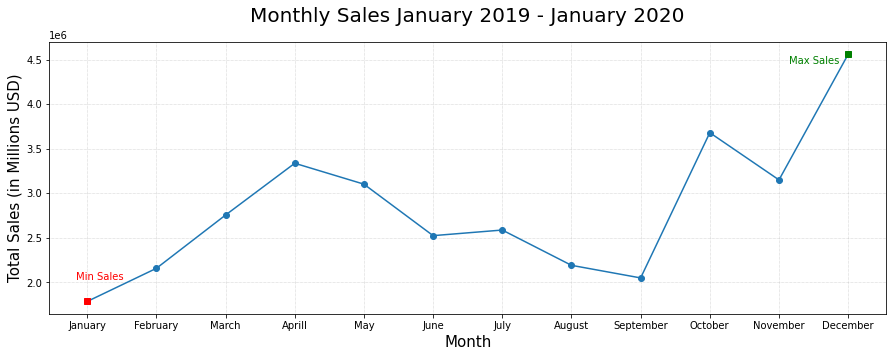

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot(monthly_sales['Order Date'], monthly_sales['Sales'],  marker='o')
ax.set_title('Monthly Sales January 2019 - January 2020', loc='center', pad=20, fontsize=20, color='black')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Total Sales (in Millions USD)', fontsize=15)
ax.grid(color='darkgray', linestyle=':', linewidth=0.5)
ax.set_xticks(monthly_sales['Order Date'])
month_labels = ['January', 'February', 'March', 'Aprill', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(month_labels)
ax.text(0.81, 0.82, 'Max Sales', transform=fig.transFigure, color='green')
ax.plot(monthly_sales.iloc[11,0],monthly_sales.iloc[11,1],   marker='s', color='green')
ax.text(0.15, 0.22, 'Min Sales', transform=fig.transFigure, color='red')
ax.plot(monthly_sales.iloc[0,0],monthly_sales.iloc[0,1],   marker='s', color='red')
plt.show()

Based on the plot above, the answer is that:
The month with the highest sales: **December**

With the amount of sales in the month: **4,557,905 USD**

This is retail data from the USA, so in December there was a peak in sales due to _Christmas and New Year's Day.

Lowest selling month: **January**

With total sales for the month: **1,786,511 USD**

**2. Which city has the highest and lowest sales?**

Added `City` column by taking city name from `Purchase Address` . field

In [20]:
# Added City Column
list_city = []
for i in df['Purchase Address']:
    list_city.append(i.split(",")[1])
df['City'] = list_city
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.95,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.99,Austin


Apply the `.groupby()` method to generate the number of sales for each `City`

In [21]:
city_sales=df.groupby(["City"])['Sales'].sum().sort_values(ascending=False)
city_sales=city_sales.to_frame()
city_sales

,Sales
City,
San Francisco,8.124121e+06
Los Angeles,5.354040e+06
New York City,4.581659e+06
Boston,3.604081e+06
Atlanta,2.741642e+06
Dallas,2.717794e+06
Seattle,2.693049e+06
Portland,2.276649e+06
Austin,1.786746e+06


Based on the results above, the City with the _Highest Sales_ is **San Francisco** with total sales **8,124,121 USD**

while the City with _Lowest Sales_ is **Austin** with total sales **1,786,746 USD**

**3. Give recommendations on the right time to place your ad to maximize the possibility of buying the most consumers!**

Apply the `.groupby()` method to generate average sales per hour

In [22]:
mean_hourly_sales = df.groupby(df['Order Date'].dt.hour).agg({'Sales':np.mean}).reset_index()

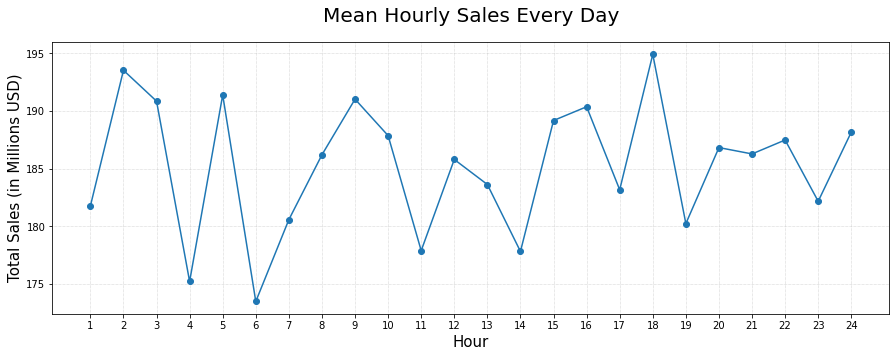

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot(mean_hourly_sales['Order Date'], mean_hourly_sales['Sales'],  marker='o')
ax.set_title('Mean Hourly Sales Every Day', loc='center', pad=20, fontsize=20, color='black')
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Total Sales (in Millions USD)', fontsize=15)
ax.grid(color='darkgray', linestyle=':', linewidth=0.5)
ax.set_xticks(mean_hourly_sales['Order Date'])
time_list=np.arange(1,25)
ax.set_xticklabels(time_list)
plt.show()

Apply the `.groupby()` method to generate the number of sales per hour

In [24]:
total_hourly_sales = df.groupby(df['Order Date'].dt.hour).agg({'Sales':sum}).reset_index()

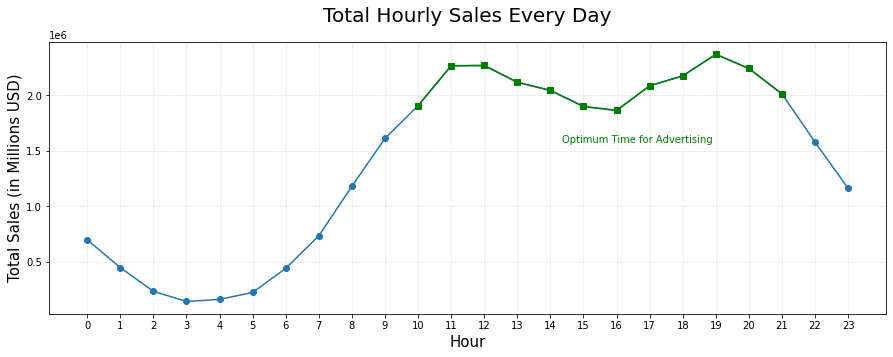

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot(total_hourly_sales['Order Date'], total_hourly_sales['Sales'],  marker='o')
ax.set_title('Total Hourly Sales Every Day', loc='center', pad=20, fontsize=20, color='black')
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Total Sales (in Millions USD)', fontsize=15)
ax.grid(color='darkgray', linestyle=':', linewidth=0.5)
ax.set_xticks(total_hourly_sales['Order Date'])
time_list=np.arange(1,25)
ax.text(0.60, 0.60, 'Optimum Time for Advertising', transform=fig.transFigure, color='green')
ax.plot(total_hourly_sales.iloc[10:22,0],total_hourly_sales.iloc[10:22,1],   marker='s', color='green')
plt.show()

From the two visualizations above, and the previous monthly sales visualization, at certain times (Example: December, Christmas Day) then **the right time to maximize advertising is between 11 am to 10 pm.**

**4. What products sell the most? What do you think is the reason?**

Apply the `.groupby()` method to generate the sales amount of each `Product`

In [26]:
df_p=df.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
df_p=df_p.to_frame()
df_p

,Quantity Ordered
Product,
AAA Batteries (4-pack),30487
AA Batteries (4-pack),27148
USB-C Charging Cable,23555
Lightning Charging Cable,22841
Wired Headphones,20201
Apple Airpods Headphones,15383
Bose SoundSport Headphones,13236
27in FHD Monitor,7429
iPhone,6732


The results above show the best-selling products sold during January 2019 - January 2020. The two best-selling products are `AAA Batteries` and `AA Batterie`. It was possible because that year many people needed these products because they had the appropriate gadgets.